#### D1122_work_김현우
- 웹 데이터 추출 및 분석
    - 네이버 박스오피스 영화 크롤링 및 분석

#### 박스오피스 TOP10 영화들의 장르별 분석
-  장르와 박스오피스 평균 순위와의 관계
-  장르와 평균 평점과의 관계
-  장르와 평균 러닝타임과의 관계

[1] 모듈 로딩 <hr>

In [ ]:
# 데이터 크롤링
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [9]:
# 데이터 분석
import pandas as pd
import matplotlib.pyplot as plt
import re

In [10]:
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

[2] 크롤링할 영화 URL 리스트 <hr>

In [11]:
urls = [
    # 위키드: 포 굿
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=37041608&qvt=0&query=%EC%9C%84%ED%82%A4%EB%93%9C%3A%20%ED%8F%AC%20%EA%B5%BF',
    # 나우 유 씨 미 3
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=2716530&qvt=0&query=%EB%82%98%EC%9A%B0%20%EC%9C%A0%20%EC%94%A8%20%EB%AF%B8%203',
    # 극장판 체인소 맨: 레제편
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=37363629&qvt=0&query=%EA%B7%B9%EC%9E%A5%ED%8C%90%20%EC%B2%B4%EC%9D%B8%EC%86%8C%20%EB%A7%A8%3A%20%EB%A0%88%EC%A0%9C%ED%8E%B8',
    # 국보
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=37520907&qvt=0&query=%EA%B5%AD%EB%B3%B4',
    # 프레데터: 죽음의 땅
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=36831199&qvt=0&query=%ED%94%84%EB%A0%88%EB%8D%B0%ED%84%B0%3A%20%EC%A3%BD%EC%9D%8C%EC%9D%98%20%EB%95%85',
    # 나혼자 프린스
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=35072207&qvt=0&query=%EB%82%98%ED%98%BC%EC%9E%90%20%ED%94%84%EB%A6%B0%EC%8A%A4',
    # 퍼스트 라이드
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=36760623&qvt=0&query=%ED%8D%BC%EC%8A%A4%ED%8A%B8%20%EB%9D%BC%EC%9D%B4%EB%93%9C',
    # 세계의 주인
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=37313358&qvt=0&query=%EC%84%B8%EA%B3%84%EC%9D%98%20%EC%A3%BC%EC%9D%B8',
    # 극장판 귀멸의 칼날: 무한성편
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=36591226&qvt=0&query=%EA%B7%B9%EC%9E%A5%ED%8C%90%20%EA%B7%80%EB%A9%B8%EC%9D%98%20%EC%B9%BC%EB%82%A0%3A%20%EB%AC%B4%ED%95%9C%EC%84%B1%ED%8E%B8',
    # 극장판 똘똘이: 아기공룡의 비밀
    'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=39930375&qvt=0&query=%EA%B7%B9%EC%9E%A5%ED%8C%90%20%EB%98%98%EB%98%98%EC%9D%B4%3A%20%EC%95%84%EA%B8%B0%EA%B3%B5%EB%A3%A1%EC%9D%98%20%EB%B9%84%EB%B0%80'
]

 [3] 각 영화 페이지에서 정보 추출 <hr>

In [12]:
# 영화 데이터 저장할 리스트
movies = []     

# 반복문을 사용해 각 url을 순회하도록 설정
for url in urls:

    # BeautifulSoup 객체 생성, url을 열고 html을 파싱해서 객체 생성
    bs = BeautifulSoup(urlopen(url), 'html.parser')

    # 1. 영화 제목 추출 ==========================================================
    # 추출한 html 코드

    # <span class="area_text_title">
    #   <strong class="_text" style="">위키드: 포 굿</strong>
    # </span>
    # ==========================================================================
    # select_one(CSS 선택자): 조건에 맞는 첫 번째 요소만 반환 (없으면 None)
    # CSS 선택자: CSS로 스타일을 적용할 HTML 요소를 선택하는 방법
    # span 태그면서 클래스 이름이 'area_text_title',
    # 그 안에서 strong 태그면서 클래스가 '_text'
    title_tag = bs.select_one('span.area_text_title strong._text')
    # === debugging ===
    # print(title_tag)   
           
    # text가 영화제목 부분을 가리킴
    title = title_tag.text.strip() 

    # 2. 영화 평점 추출 ==========================================================
    # 추출한 html 코드

    # <div class="item_info"> 
    #     <span class="this_text_bold">7.56</span> 
    # </div>
    # ==========================================================================
    rating_tag = bs.select_one('div.item_info span.this_text_bold')
    # === debugging ===
    # print(rating_tag)        
    rating = float(rating_tag.text.strip())


    # 3. 누적 관객수 및 순위 추출 =================================================
    # <div class="item_box"> 
    #   <strong class="item_title">
    #       "순위" 
    #       <span class="ico_dot"></span>
    #       "누적 관객수"
    #   </strong> 

    #   <div class="item_info"> 
    #       <span class="normal_text">
    #           <em>1</em>
    #           "위 / "
    #           <em>40</em>
    #           "만명"
    #       </span> 
    #   </div> 
    # </div>
    # ==========================================================================
    # div.item_box 클래스를 가진 모든 div 태그 선택
    for item_box in bs.select('div.item_box'):  

        # 한 영화 안에 item_box 클래스가 여러 개 존재해서 '순위' text가 존재하는 클래스만 필터링
        if '순위' in item_box.text:
            # === debugging ===
            # print(item_box)   
            em_tags = item_box.select('span.normal_text em')

            if len(em_tags) >= 2:   # em_tags 리스트 안에 2개 이상의 요소 있는지 확인(순위, 누적관객수)
                rank = int(em_tags[0].text.strip())
                aud_num = em_tags[1].text.strip().replace("만", "")
                audience = int(float(aud_num) * 10000)  # 만명 기준 -> 변환 

    # 4. 장르 및 러닝타임 추출 ====================================================
    # <div class="info_group"> 
    #   <dt>
    #       <span class="cm_bar"></span>
    #       "개요"
    #   </dt> 
    #   <dd>
    #       "판타지"
    #       <span class="cm_bar_info"></span>
    #       "137분"
    #   </dd> 
    # </div>
    # ==========================================================================
    # div 태그의 info_group 클래스의 dd 태그(CSS선택자 형태)
    dd_tag = bs.select_one('div.info_group dd')
    # === debugging ===
    # print(dd_tag)

    if dd_tag:
        # 각 text들을 "|" 문자로 나누어 리스트 변환
        txt = dd_tag.get_text(separator='|')
        # === debugging ===
        # print(txt)

        # "|" 문자로 나눈 문자열의 [0]인덱스인 장르 추출
        genre = txt.split('|')[0].strip()
        # === debugging ===
        # print(genre)

        # 정규표현식으로 러닝타임 추출
        # \d+: 하나 이상의 숫자
        match = re.search(r'(\d+)분', txt)
        # === debugging ===
        # print(match.group())

        if match:
            # 첫 번째 캡처 그룹의 매칭 텍스트(숫자만) 저장
            runtime = int(match.group(1))
            
    # ==========================================================================
    # 리스트에 딕셔너리 형태로 영화 데이터 모두 append
    movies.append({'순위': rank, 
                   '제목': title, 
                   '평점': rating, 
                   '누적관객수': audience, 
                   '장르': genre, 
                   '러닝타임': runtime})
    # ==========================================================================    
    # === debugging ===
    print(f"✓ {title}\n")

✓ 위키드: 포 굿

✓ 나우 유 씨 미 3

✓ 극장판 체인소 맨: 레제편

✓ 국보

✓ 프레데터: 죽음의 땅

✓ 나혼자 프린스

✓ 퍼스트 라이드

✓ 세계의 주인

✓ 극장판 귀멸의 칼날: 무한성편

✓ 극장판 똘똘이: 아기공룡의 비밀



[4] 데이터프레임 생성 <hr>

In [13]:
datadf = pd.DataFrame(movies)
display(datadf)

,순위,제목,평점,누적관객수,장르,러닝타임
0,1,위키드: 포 굿,7.51,530000,판타지,137
1,2,나우 유 씨 미 3,7.82,1010000,범죄,112
2,3,극장판 체인소 맨: 레제편,9.27,3270000,애니메이션,100
3,4,국보,9.12,58000,드라마,175
4,5,프레데터: 죽음의 땅,8.62,400000,SF,107
5,6,나혼자 프린스,7.50,35000,코미디,116
6,9,퍼스트 라이드,7.57,720000,코미디,116
7,7,세계의 주인,9.08,120000,드라마,119
8,8,극장판 귀멸의 칼날: 무한성편,9.03,5640000,애니메이션,155
9,10,극장판 똘똘이: 아기공룡의 비밀,8.14,36000,애니메이션,78


[5] 시각화 <hr>

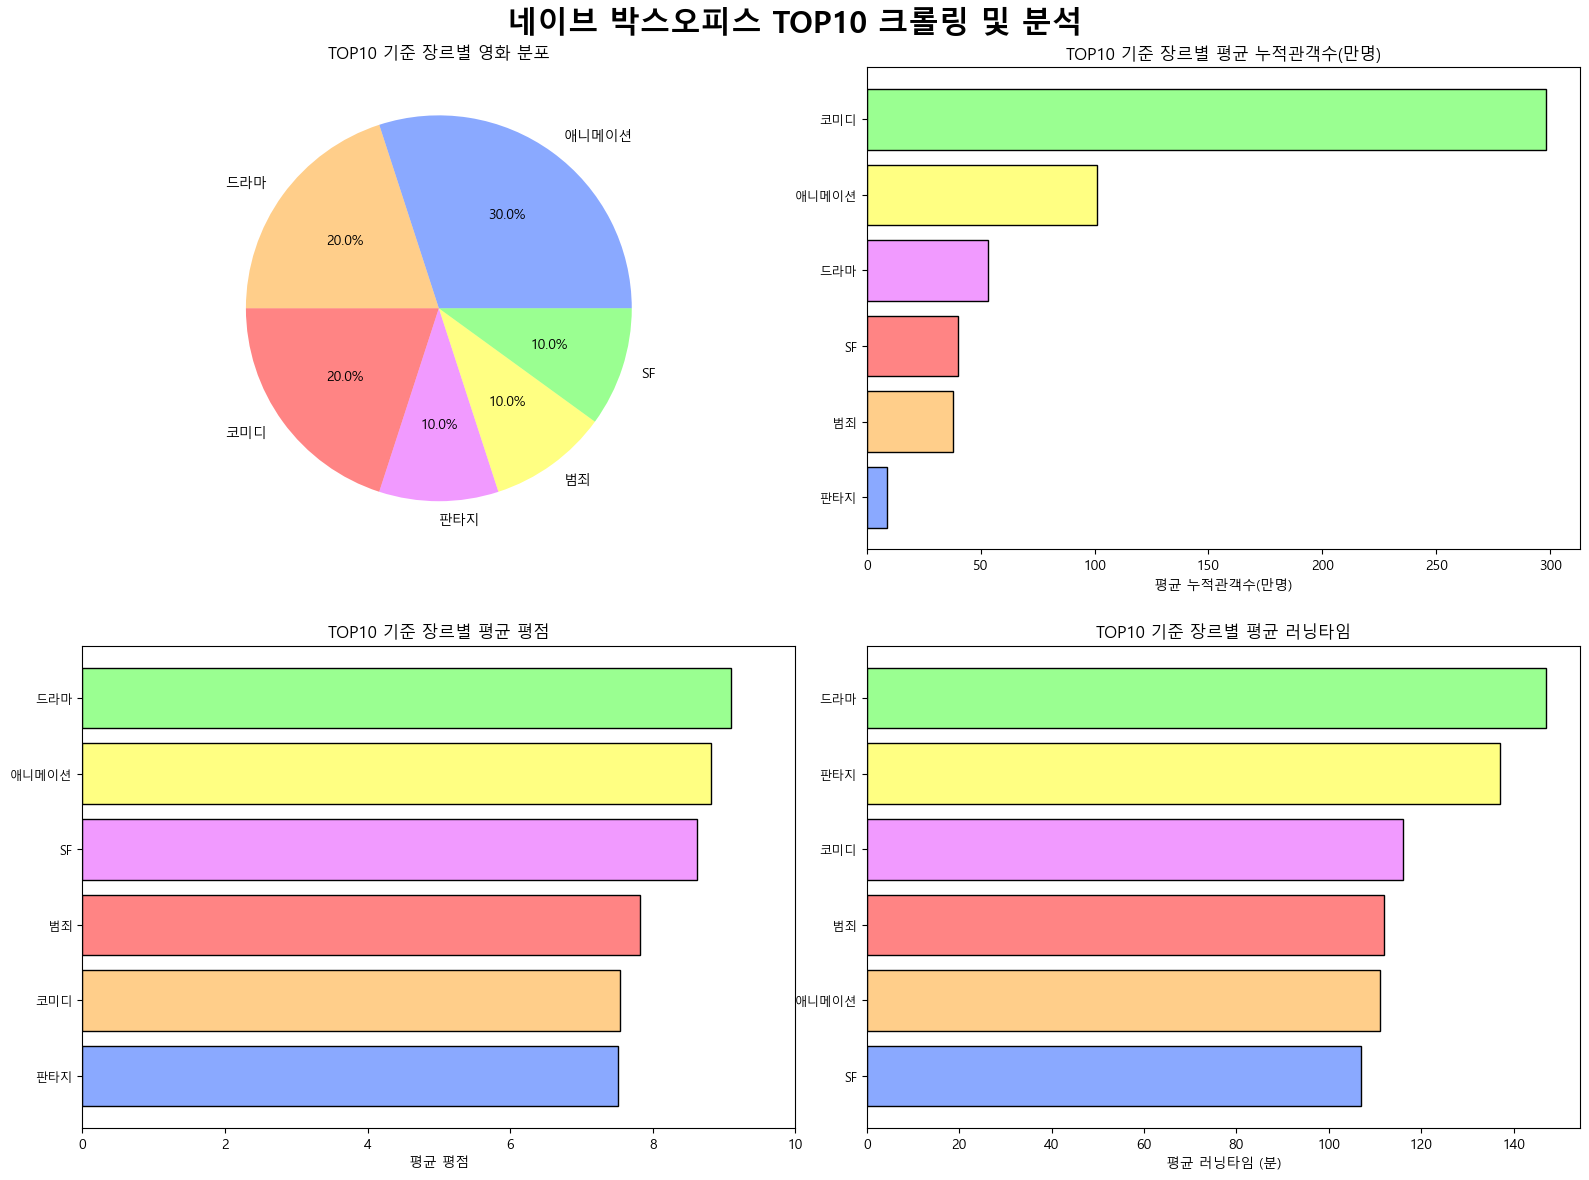

In [14]:
# 기본 세팅 ==================================================================================================
colors = ["#0044FF75", "#FF950075","#FF00007B", "#DD00FF65", "#FFFF007D", "#15FF006E"]

datadf['누적관객수(만명)'] = datadf['누적관객수'] / 10000

genre_counts = datadf['장르'].value_counts()
# === debugging ===
# print(genre_counts)

genre_rank = datadf.groupby('장르')['순위'].mean().sort_values()
# === debugging ===
# print(genre_rank)

genre_audience = datadf.groupby('장르')['누적관객수(만명)'].mean().sort_values()
# === debugging ===
# print(genre_audience)

genre_rating = datadf.groupby('장르')['평점'].mean().sort_values()
# === debugging ===
# print(genre_rating)

genre_runtime = datadf.groupby('장르')['러닝타임'].mean().sort_values()
# === debugging ===
# print(genre_runtime)

# 시각화 ====================================================================================================
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('네이브 박스오피스 TOP10 크롤링 및 분석', fontsize=22, fontweight='bold')

# 1) TOP10 기준 장르별 영화 분포 파이차트
axs[0, 0].pie(genre_counts.values, labels=genre_counts.index, autopct='%1.1f%%', 
              colors=colors[:len(genre_counts)])
axs[0, 0].set_title('TOP10 기준 장르별 영화 분포')

# 2) TOP10 기준 장르별 평균 순위 막대그래프
axs[0, 1].barh(genre_rank.index, genre_audience.values, color=colors[:len(genre_rank)], edgecolor='black')
axs[0, 1].set_xlabel('평균 누적관객수(만명)')
axs[0, 1].set_title('TOP10 기준 장르별 평균 누적관객수(만명)')
axs[0, 1].tick_params(axis='y', labelsize=9)

# 3) TOP10 기준 장르별 평균 평점 막대그래프
axs[1, 0].barh(genre_rating.index, genre_rating.values, color=colors[:len(genre_rating)], edgecolor='black')
axs[1, 0].set_xlabel('평균 평점')
axs[1, 0].set_title('TOP10 기준 장르별 평균 평점')
axs[1, 0].set_xlim(0, 10)
axs[1, 0].tick_params(axis='y', labelsize=9)

# 4) TOP10 기준 장르별 평균 러닝타임 막대그래프
axs[1, 1].barh(genre_runtime.index, genre_runtime.values, color=colors[:len(genre_runtime)], edgecolor='black')
axs[1, 1].set_xlabel('평균 러닝타임 (분)')
axs[1, 1].set_title('TOP10 기준 장르별 평균 러닝타임')
axs[1, 1].tick_params(axis='y', labelsize=9)

plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.2)  # 간격 넓히기
plt.show()

[6] 인사이트 도출 <hr>



#### 1. 장르의 다양성과 흥행성의 불균형이 존재함. <hr>
- 박스오피스 Top 10에는 애니메이션, 드라마, 코미디, 판타지, 범죄, SF 같은 다양한 장르가 존재하지만, 누적관객수 면에서는 애니메이션이 압도적으로 우위를 차지합니다. 
- 이를 통해서 애니메이션이 요즘 최대로 유행하고 있고 팬덤층이 두터운 것을 알 수 있었습니다.

#### 2. 장르별 평점과 러닝타임의 상관관계. <hr>
- 드라마 1위, 애니메이션 2위, SF 3위, ~ 판타지 6위의 장르별 평점 순위가 평균 러닝타임에서도 그래도 나타나는 것을 알 수 있었습니다.
- 명확하게 동일한 수치이기 때문에, 관객들이 높은 평가를 주는 영화는 충분한 러닝타임을 확보하고 있고 또한, 여유로운 러닝타임이 더 완성도 있는 스토리 라인을 확보할 수 있다는 것을 유추해볼 수 있었습니다.